In [1]:
# Import modules
import pandas as pd # used for cleaning
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading the data

In [2]:
train_df = pd.read_csv('Train_data001.csv')
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
#getting statistical description of data
train_df.describe()  

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Preprocessing

In [5]:
# for finding the null values in the data
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# fill the missing values for numerical terms ---> filling the mean 
train_df['LoanAmount']=train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean())
train_df['Loan_Amount_Term']=train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mean())
train_df['Credit_History']=train_df['Credit_History'].fillna(train_df['Credit_History'].mean())

In [7]:
train_df['Gender'].mode() # mode gives in the form of dataframe ,hence we are using mode()[0]---> gives value

0    Male
dtype: object

In [8]:
 # fill the missing values for categorical terms ---> filling through mode 
train_df['Gender']=train_df['Gender'].fillna(train_df['Gender'].mode()[0])
train_df['Married']=train_df['Married'].fillna(train_df['Married'].mode()[0])
train_df['Dependents']=train_df['Dependents'].fillna(train_df['Dependents'].mode()[0])
train_df['Self_Employed']=train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0])

In [9]:
train_df.isnull().sum() ## checking null values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data analysis

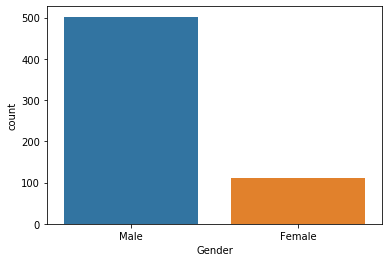

In [10]:
# categorical attributes visualization
sns.countplot(train_df['Gender'])

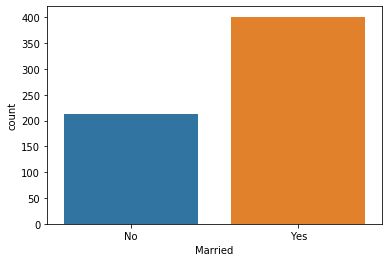

In [11]:
sns.countplot(train_df['Married'])

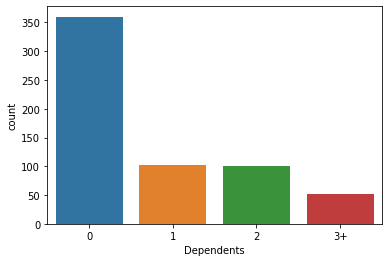

In [12]:
sns.countplot(train_df['Dependents'])

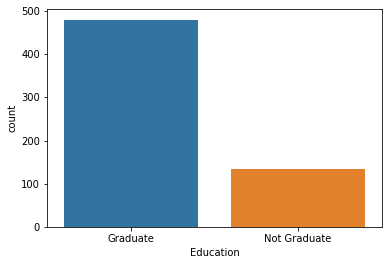

In [13]:
sns.countplot(train_df['Education'])

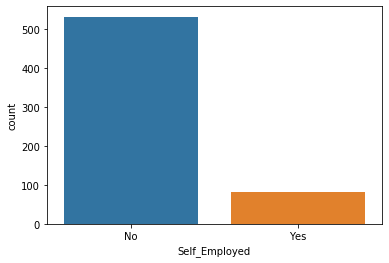

In [14]:
sns.countplot(train_df['Self_Employed'])

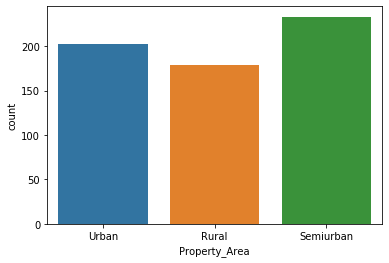

In [15]:
sns.countplot(train_df['Property_Area'])

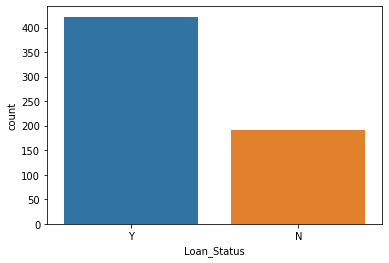

In [16]:
sns.countplot(train_df['Loan_Status'])

## Creation of new attributes

In [17]:
train_df['Total_income'] = train_df['ApplicantIncome']+train_df['CoapplicantIncome']
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,9613.0
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,3849.0
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N,5540.0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,5532.0
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N,23809.0


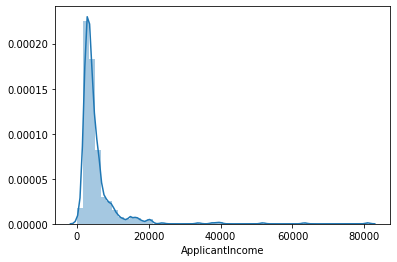

In [18]:
# numerical attributes visualization
sns.distplot(train_df['ApplicantIncome'])

## Log Transformation

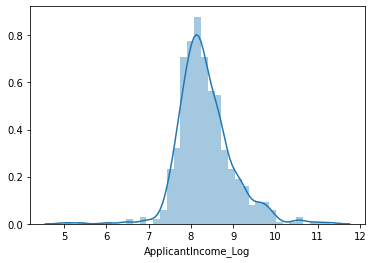

In [19]:
# we'll apply log transformation function to normalize the attribute to find ideal bell curve
train_df['ApplicantIncome_Log'] = np.log(train_df['ApplicantIncome'])
sns.distplot(train_df['ApplicantIncome_Log'])

### now we can see that it is in the form of bell curve ,instead of being left skewed and also the mean value in the center

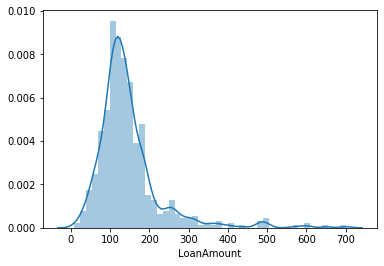

In [20]:
sns.distplot(train_df['LoanAmount'])

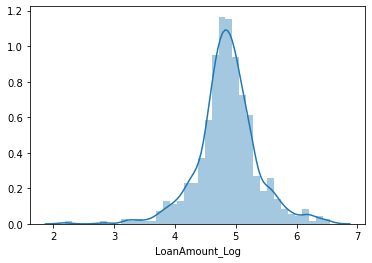

In [21]:
train_df['LoanAmount_Log'] = np.log(train_df['LoanAmount'])
sns.distplot(train_df['LoanAmount_Log'])

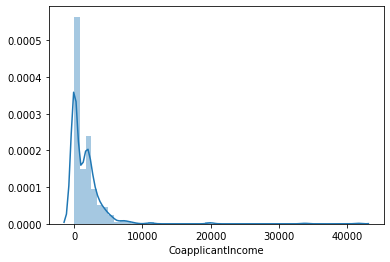

In [22]:
sns.distplot(train_df['CoapplicantIncome'])

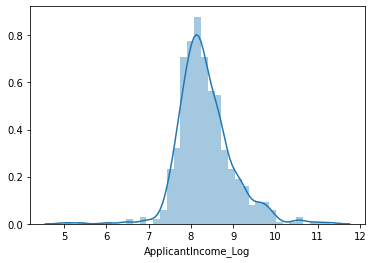

In [23]:
train_df['CoapplicantIncome_Log'] = np.log(train_df['CoapplicantIncome'])
sns.distplot(train_df["ApplicantIncome_Log"])

(array([ 89.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50., 475.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

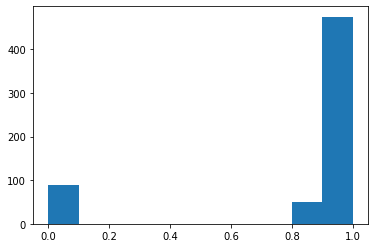

In [24]:
plt.hist(train_df['Credit_History'])# no need to apply log transform cause the value is in the range between 0 to 1

(array([  3.,   6.,   3.,  44.,   4.,   0.,  13., 526.,   0.,  15.]),
 array([ 12. ,  58.8, 105.6, 152.4, 199.2, 246. , 292.8, 339.6, 386.4,
        433.2, 480. ]),
 <a list of 10 Patch objects>)

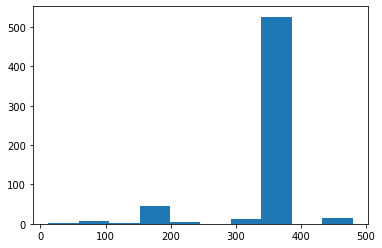

In [25]:
plt.hist(train_df['Loan_Amount_Term'])

(array([  1.,   0.,   2.,   0.,   2.,   4.,   3.,  44.,  17., 541.]),
 array([2.48490665, 2.8537946 , 3.22268254, 3.59157049, 3.96045843,
        4.32934638, 4.69823432, 5.06712227, 5.43601021, 5.80489816,
        6.1737861 ]),
 <a list of 10 Patch objects>)

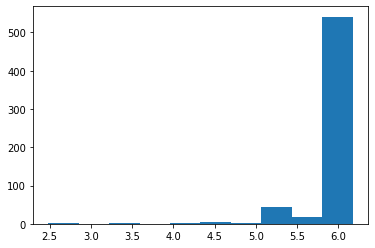

In [26]:
train_df['Loan_Amount_Term_Log'] = np.log(train_df['Loan_Amount_Term'])
plt.hist(train_df["Loan_Amount_Term_Log"])

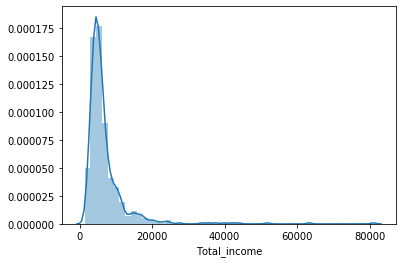

In [27]:
sns.distplot(train_df['Total_income'])

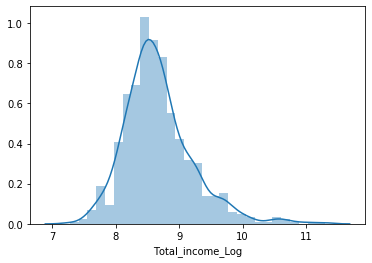

In [28]:
train_df['Total_income_Log'] = np.log(train_df['Total_income'])
sns.distplot(train_df['Total_income_Log'])

## Corelation Matrix

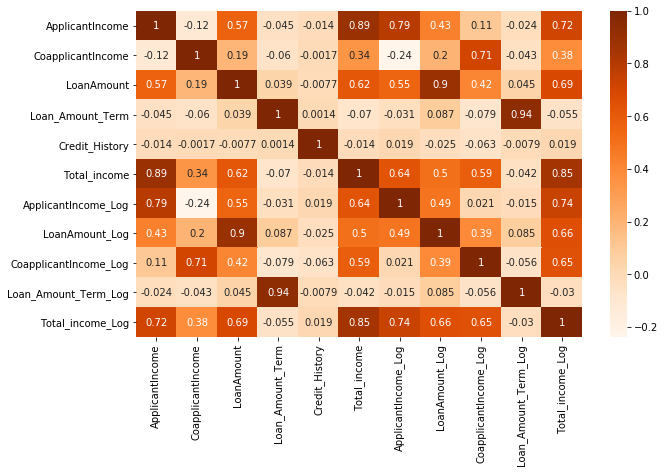

In [29]:
corr=train_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap ='Oranges')

In [30]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncome_Log,LoanAmount_Log,CoapplicantIncome_Log,Loan_Amount_Term_Log,Total_income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,4.986426,-inf,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,4.852030,7.318540,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655,-inf,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,4.787492,7.765569,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760,-inf,5.886104,8.699515


In [31]:
## dropping some of the colums for like true values except log terms so that we can train our data very vell
cols = ['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_income','CoapplicantIncome_Log']
train_df = train_df.drop(columns=cols,axis=1)
train_df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Total_income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515
5,Male,Yes,2,Graduate,Yes,1.0,Urban,Y,8.597297,5.587249,5.886104,9.170872
6,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.754910,4.553877,5.886104,8.255569
7,Male,Yes,3+,Graduate,No,0.0,Semiurban,N,8.018296,5.062595,5.886104,8.619750
8,Male,Yes,2,Graduate,No,1.0,Urban,Y,8.295549,5.123964,5.886104,8.618305
9,Male,Yes,1,Graduate,No,1.0,Semiurban,N,9.460398,5.855072,5.886104,10.077819


## Label Encoder

In [32]:
## We need to convert all the categorical values to numbers hence we are using label encoder
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Self_Employed','Loan_Status','Property_Area','Dependents']
le = LabelEncoder()
for col in cols:
    train_df[col]=le.fit_transform(train_df[col])

In [33]:
train_df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Total_income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515
5,1,1,2,0,1,1.0,2,1,8.597297,5.587249,5.886104,9.170872
6,1,1,0,1,0,1.0,2,1,7.754910,4.553877,5.886104,8.255569
7,1,1,3,0,0,0.0,1,0,8.018296,5.062595,5.886104,8.619750
8,1,1,2,0,0,1.0,2,1,8.295549,5.123964,5.886104,8.618305
9,1,1,1,0,0,1.0,1,0,9.460398,5.855072,5.886104,10.077819


## Train-Test split

In [34]:
# specifying the input and output attributes 
X = train_df.drop(columns=['Loan_Status'], axis=1)
y = train_df['Loan_Status']

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model Training

In [36]:
#  we are going to define a classify function for reuse purpose of model
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # normally cv = 5 or 3 is used and we are using 5 for our model
    score = cross_val_score(model, x, y, cv=3)
    print("Cross validation is",np.mean(score)*100)

In [37]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
classify(model, X, y)

Accuracy is 22.379279956061282
Cross validation is 26.89747706310576


In [38]:
# Loistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 77.27272727272727
Cross validation is 81.1119081779053


In [39]:
## most of we need to give preferences to cross validation score because it is the overall performance of the model

In [40]:
# DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 72.07792207792207
Cross validation is 70.19289016419576


In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 78.57142857142857
Cross validation is 79.15431213135662


In [42]:
## KNN 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classify(model, X, y)

Accuracy is 79.87012987012987
Cross validation is 78.66650725330784


## HyperParmeter Tuning 

In [43]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 75.32467532467533
Cross validation is 79.80710983580424


## confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

In [45]:
conf_matrix.shape

(2, 2)

In [46]:
conf_matrix

array([[18, 36],
       [ 2, 98]], dtype=int64)

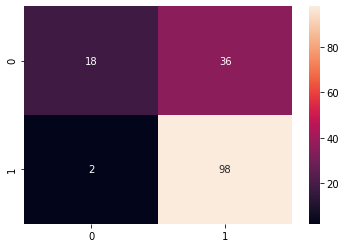

In [47]:
sns.heatmap(conf_matrix, annot=True)